In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [32]:
df = pd.read_csv('billionaires.csv')

In [33]:
df['wealth.worth in billions'].mean()

3.531943381790374

In [34]:
df['wealth.worth in billions'].median()

2.0

In [35]:
df['wealth.worth in billions'].mode()

0    1.1
dtype: float64

In [36]:
dfsorted = df.sort_values(by='wealth.worth in billions',ascending = False, ignore_index=True)
dfsorted
dftrimmed = dfsorted.loc[261:2353,'wealth.worth in billions']
#trimmed 10% from both the lowest and the highest, brought the mean down, which means the top 10% is way high.

In [37]:
dftrimmed.mean()

2.4521739130434903

<AxesSubplot:>

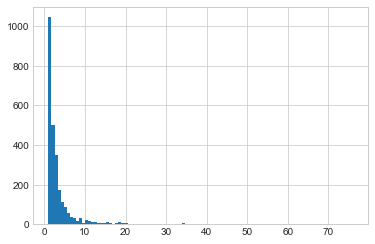

In [51]:
df['wealth.worth in billions'].hist(bins=100)
#Mean: 3.5, Median: 2, Mode: 1.1, trimmed mean: 2.5, seems all gathered in the first bin.

In [43]:
from numpy import mean, absolute

In [44]:
mean(absolute(df['wealth.worth in billions']-mean(df['wealth.worth in billions'])))

2.563225238241023

In [45]:
print(df['wealth.worth in billions'].std())

5.08881256191711


In [53]:
print(df['wealth.worth in billions'].quantile(0.75) - df['wealth.worth in billions'].quantile(0.25))
#The mean absolute deviation is 2.6. 
#Standard deviation usually is greater, because it calculates the square of the difference.
#The IQR is close to the Mean Absolute Deviation in this case.

2.1


3.5
1.4


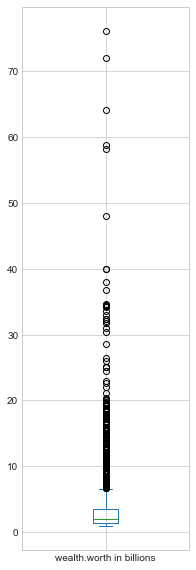

In [57]:
df['wealth.worth in billions'].plot.box(figsize=(3,10))
print(df['wealth.worth in billions'].quantile(0.75))
print(df['wealth.worth in billions'].quantile(0.25))
#the top of the box is 75% quantiles and the bottom of the box is 25% qualtiles; 
#a lot of people are out side of the 75% quantiles way richer.

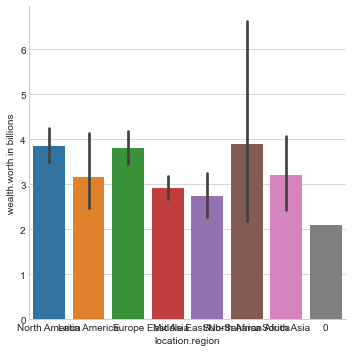

In [113]:
sns.catplot(x='location.region',y='wealth.worth in billions',kind='bar',data=df)

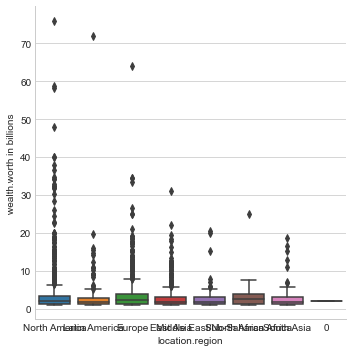

In [114]:
sns.catplot(x='location.region',y='wealth.worth in billions',kind='box',data=df)
#This plot is grouped, so do we need the next plot? I have included both of them here just in case.=)

location.region
0                           AxesSubplot(0.125,0.125;0.775x0.755)
East Asia                   AxesSubplot(0.125,0.125;0.775x0.755)
Europe                      AxesSubplot(0.125,0.125;0.775x0.755)
Latin America               AxesSubplot(0.125,0.125;0.775x0.755)
Middle East/North Africa    AxesSubplot(0.125,0.125;0.775x0.755)
North America               AxesSubplot(0.125,0.125;0.775x0.755)
South Asia                  AxesSubplot(0.125,0.125;0.775x0.755)
Sub-Saharan Africa          AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

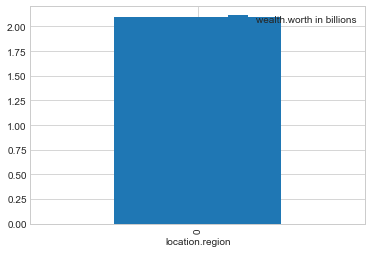

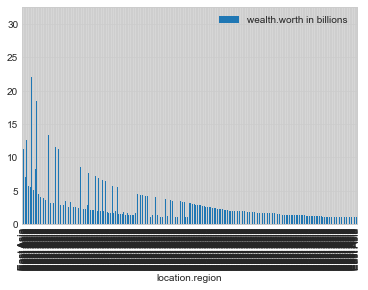

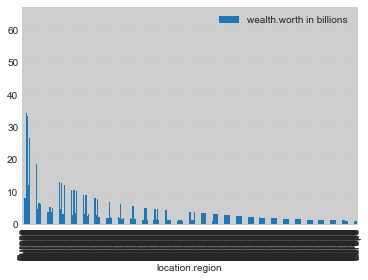

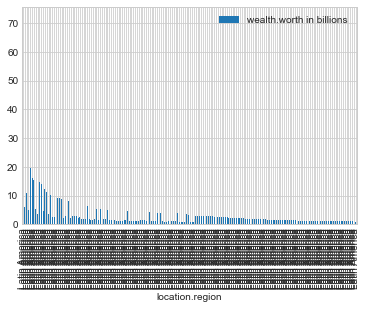

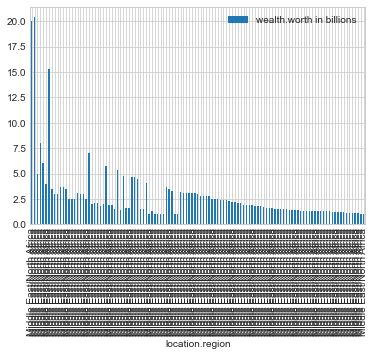

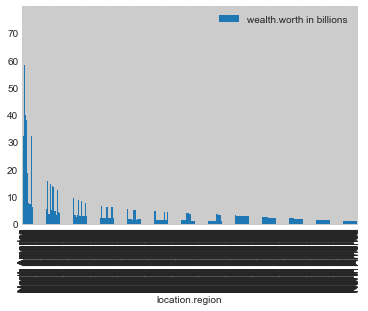

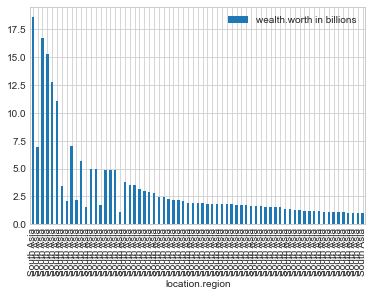

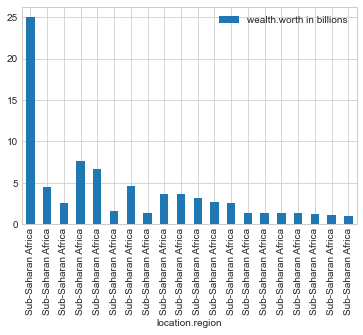

In [115]:
df.groupby('location.region').plot.bar('location.region','wealth.worth in billions')

In [84]:
col1=df['demographics.age']
col3=df['wealth.worth in billions']
correlation=col1.corr(col3)
print(correlation)

0.11986980559051258


<AxesSubplot:xlabel='demographics.age', ylabel='wealth.worth in billions'>

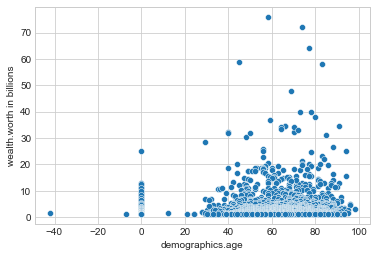

In [89]:
sns.scatterplot(x="demographics.age", y="wealth.worth in billions",data=df)
#the bottom line is around 0.12 as the correlation calculated.

<AxesSubplot:xlabel='demographics.age', ylabel='wealth.worth in billions'>

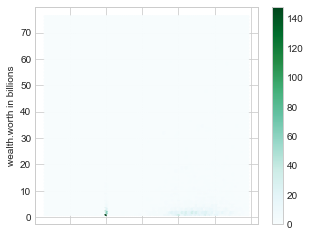

In [110]:
df.plot.hexbin(x="demographics.age", y="wealth.worth in billions",figsize=(5,4))

AttributeError: module 'seaborn' has no attribute 'hexbin'

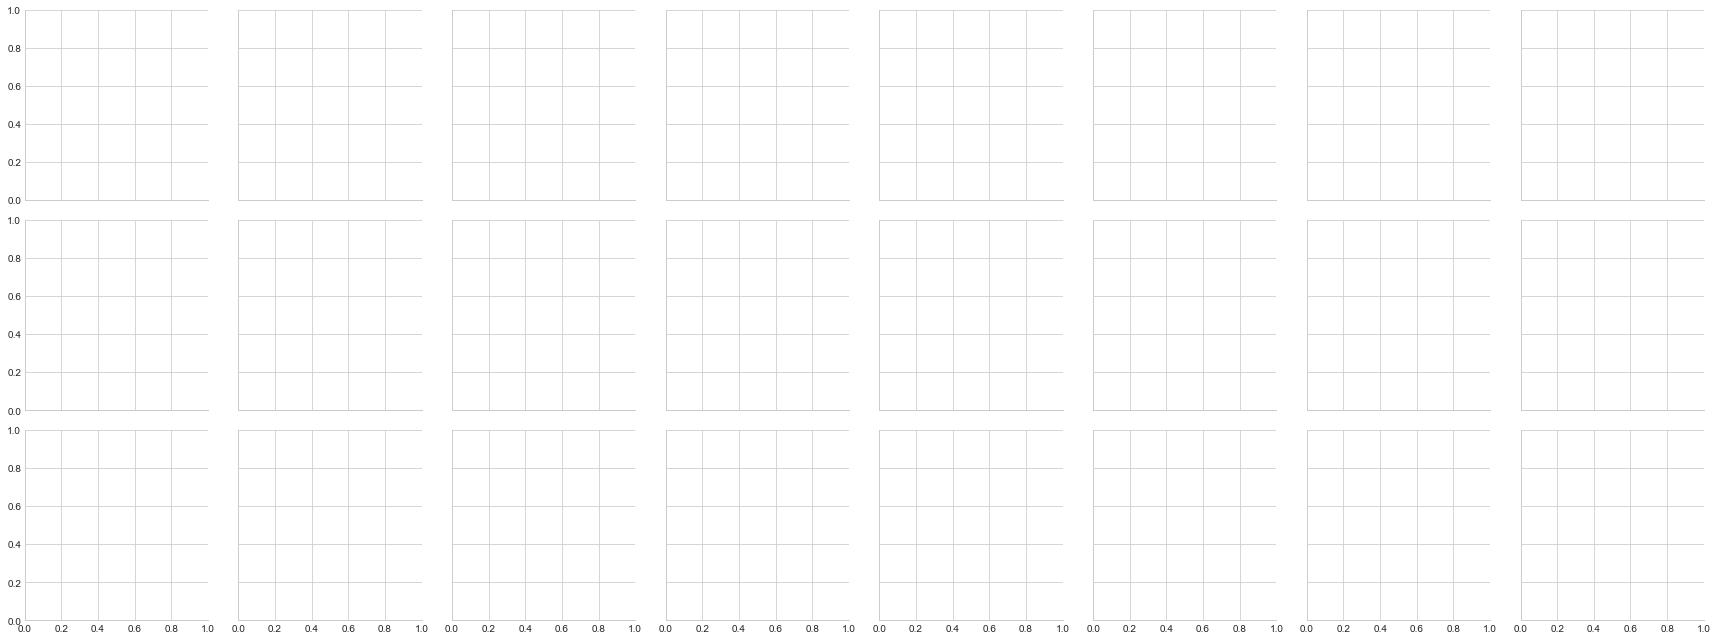

In [120]:
g=sns.FacetGrid(df,col='location.region',row='year')
g.map(sns.hexbin,'wealth.worth in billions','df')
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(tips, hue="year", col="year", height=4)
g.map(hexbin, "wealth.worth in billions", "demographics.age", extent=[0, 50, 0, 10])
#http://man.hubwiz.com/docset/Seaborn.docset/Contents/Resources/Documents/tutorial/axis_grids.html
#I got the coding from above link, not sure why module 'seaborn' has no attribute 'hexbin', please kindly advise. Thank you! =)